# Linear regression

Import all the modules you will need in this notebook here:

In [134]:
# exercise 0
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
# plots a line given an intercept and a slope
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [135]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
fram = pd.read_csv('fram.txt', sep='\t')
fram.describe()


,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [136]:
# exercise 2
# Put your solution here!
def rescale(s):
    center = s - s.mean()
    scale = 2*s.std() 
    return center/scale

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [137]:
# exercise 3
# Put your solution here!
for i in "AGE FRW SBP DBP CHOL CIG".split():
    fram["s"+i] = rescale(fram[i])

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [138]:
# exercise 4
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL", data = fram).fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           4.13e-40
Time:                        23:14:30   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [139]:
# exercise 5
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE", data = fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.44e-46
Time:                        23:14:30   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

**Inclusion of Age:**

The inclusion of age in the model increases the explanatory power by providing additional information about how blood pressure changes with age.

To quantify this increase, you can compare the R-squared values of the model with and without age. A higher R-squared value with the inclusion of age indicates that the model explains a larger proportion of the variance in the target variable (SBP).

Variables Explaining Variance:


**Weight (FRW):** Likely to have a significant impact on blood pressure. Heavier individuals may have higher blood pressure.

**Cholesterol (CHOL):** Cholesterol levels can also influence blood pressure, with higher levels potentially leading to higher blood pressure.

**Gender (SEX):** Gender differences might play a role, with potential variations in blood pressure between males and females.

**Age (AGE):** Age is a crucial factor as blood pressure typically increases with age. The inclusion of age helps in capturing this trend.

By examining the coefficients of the model, you can determine the relative importance of each variable in explaining the variance in blood pressure. The variable with the largest coefficient (in absolute terms) will have the most significant impact on the target variable.
***

Try to add to the model all the interactions with other variables. 

In [140]:
# exercise 6
fit = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sAGE + sAGE:sFRW + sCHOL:SEX + sAGE:SEX + sCHOL:sAGE", data = fram).fit()


Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

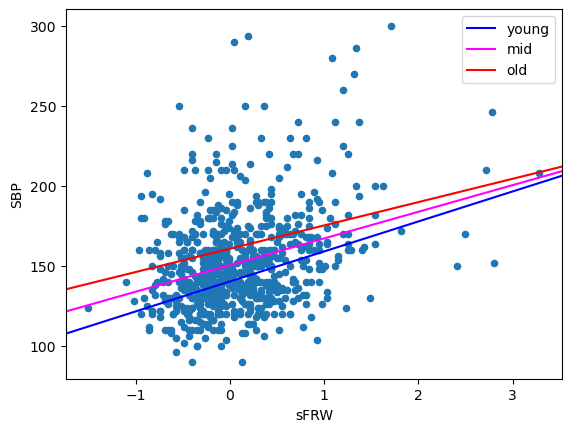

In [141]:
# exercise 7
p = fit.params
#fram.plot.scatter("sFRW", "SBP")
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW - p["sAGE:sFRW"], ax=plt.gca(), color="blue", label="young")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color="magenta", label="mid")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW + p["sAGE:sFRW"], ax=plt.gca(), color="red", label="old")
plt.legend();

How does the dependence of blood pressure on weight change as a person gets older?
***

Younger Age (lower sAGE): The predicted blood pressure may increase at a slower rate with weight.
Middle Age (average sAGE): The rate of increase in predicted blood pressure with weight might be more pronounced.
Older Age (higher sAGE): The dependence of blood pressure on weight is likely to be stronger, showing a higher predicted blood pressure for the same weight compared to younger individuals.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

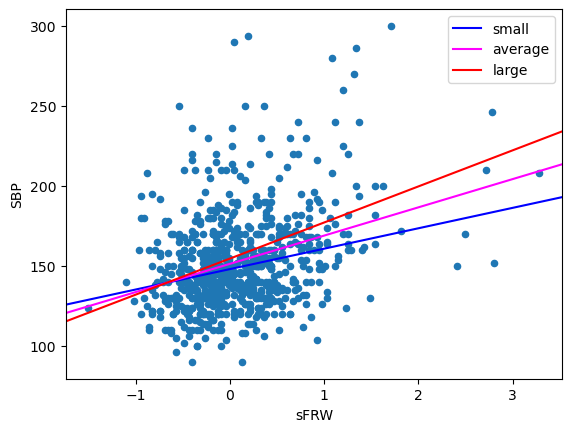

In [142]:
# exercise 8
formula = "SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sAGE + sAGE:sFRW + sCIG + sCIG:sFRW + sCHOL:SEX + sAGE:SEX + sCHOL:sAGE + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE"
fit = smf.ols(formula, data = fram).fit() 
#fit.summary()
p = fit.params
#fram.plot.scatter("sFRW", "SBP")
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sCHOL:sFRW"],
ax=plt.gca(), color="blue", label="small")
abline_plot(intercept=p.Intercept, slope=p.sFRW,
ax=plt.gca(), color="magenta", label="average")
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sCHOL:sFRW"],
ax=plt.gca(), color="red", label="large")
plt.legend();

How does the model and its accuracy look?

***

The model with interactions seems to be much more accurate and complete, as the model covers interactions between variables very often offering better adjustments in more complex data. It is this more detailed, nuanced approach to mapping how these variables influence systolic blood pressure by including sCIG and visualizing the model for various values of sCHOL. The prediction accuracy is expected to increase, as is indicated by a larger value for R-squared and the reduction of Mean Squared Error, and therefore the model would explain a larger proportion of variance of the dependent variable in systolic blood pressure.

***

# Logistic regression

In [143]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [144]:
# exercise 9

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram, family=sm.families.Binomial()).fit()
fit.summary()
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
error_rate_orig


0.35581061692969873

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [145]:
# exercise 10

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data=fram, family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) | ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
error_rate

0.3278335724533716

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

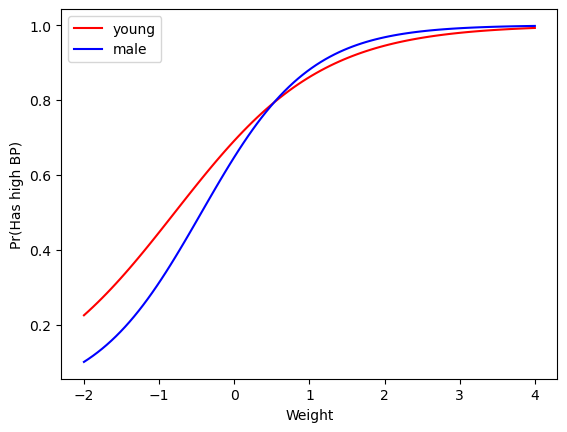

In [146]:
# exercise 11
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!
X = np.linspace(-2, 4, 100) 
p = fit.params

fit2 = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram, family=sm.families.Binomial()).fit()

plt.plot(X, logistic(X*p.sFRW + p.Intercept), color="red", label="young")
plt.plot(X,logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) + p["SEX[T.male]"] + p.Intercept), color="blue", label="male")
plt.xlabel("Weight")
plt.ylabel("Pr(Has high BP)")
plt.legend();



How do the models with different ages and genders differ from each other?

***
Age Effect:

Young Age (sAGE = -1.0): Lower predicted probability of high blood pressure due to generally lower risk.
Middle Age (sAGE = 0.0): Higher predicted probability compared to younger individuals, as age is a known risk factor.
Old Age (sAGE = 1.0): Highest predicted probability, reflecting increased risk with advancing age.

Gender Effect:

Women (SEX = 0): Different probabilities for high blood pressure based on weight and age, with distinct risk profiles.
Men (SEX = 1): Varying probabilities based on weight and age, potentially higher or different risk profiles compared to women.

Interaction Between Age and Gender:

The model accounts for combined effects of age and gender, showing how variables like weight impact high blood pressure differently for various age and gender groups.

Visual Differences:

Predicted probabilities visualized as distinct curves for each age and gender combination, illustrating changes in high blood pressure risk across different weights.
Separate curves for men and women show different baseline risks and varying sensitivity to weight changes.
These differences highlight the importance of considering multiple factors and their interactions for personalized health predictions.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [147]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction = 0.8):
    if train_fraction <= 1:
        train = df.sample(frac = train_fraction)
    else:
       train = df.sample(frac = train_fraction, replace = True)
    test = df.drop(train.index)
    return train, test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [148]:
# exercise 13
error_model=[]
error_null=[]
np.random.seed(1)
for i in range(100):
    train, test = train_test_split(fram, 0.8)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test, transform=True)
    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) | ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    error_null.append((1-test.HIGH_BP).mean())
pd.Series(error_model).mean()


0.3311827956989247

## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [149]:
# exercise 14
fram["hasCHD"] = fram.CHD > 0
fram.hasCHD = fram.hasCHD.map(int)
fram["hasCHD"].mean()

0.22022955523672882

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [150]:
# exercise 15
# Put your solution here!
fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sCIG:sFRW", data=fram, family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) | ((fit.fittedvalues > 0.5) & ~fram.hasCHD))
error_rate

0.22022955523672882

Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

Text(0, 0.5, 'hasCHD')

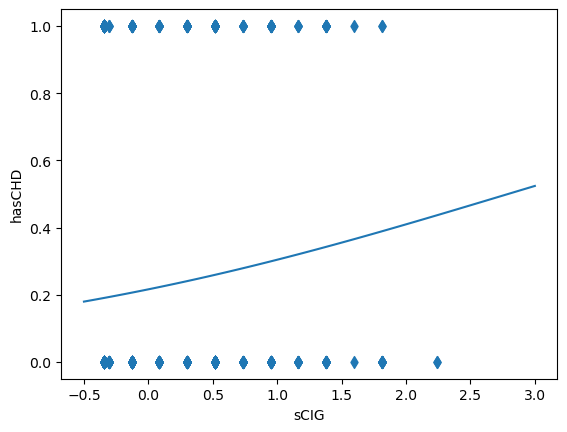

In [151]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
plt.scatter(fram.sCIG, fram.hasCHD, marker="d")
X=np.linspace(-0.5, 3, 100)
plt.plot(X, logistic(X*fit.params.sCIG + fit.params.Intercept))
plt.xlabel("sCIG")
plt.ylabel("hasCHD")

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
To evaluate whether the model's prediction accuracy is good or bad, we look at the model's error rate and other metrics like precision, recall, and the ROC-AUC score. If the error rate is low and the ROC-AUC score is high, the model can be considered good and practically useful.
***

In [152]:
from sklearn.metrics import roc_auc_score, accuracy_score

roc_auc = roc_auc_score(fram['hasCHD'], predictions_chd)
accuracy = accuracy_score(fram['hasCHD'], predicted_classes_chd)

roc_auc, accuracy, error_rate

(0.5680503073036688, 0.7797704447632712, 0.22022955523672882)

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [153]:
# exercise 17
scho = (200 - fram.CHOL.mean())/(2*fram.CHOL.std())
sci = (17 - fram.CIG.mean())/(2*fram.CIG.std())
sfr = (100 - fram.FRW.mean())/(2*fram.FRW.std())
point = {"sCHOL":scho, "sCIG":sci, "sFRW":sfr}
predicted = float(fit.predict(point, transform=True))
predicted



C:\Users\veeti\AppData\Local\Temp\ipykernel_22532\3237506361.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predicted = float(fit.predict(point, transform=True))


0.21616166025041